# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various day

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get data

C:\Users\user\Downloads\Github\JupyterWorkflow\data.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.column = ['Weat', 'East']


<AxesSubplot:xlabel='time'>

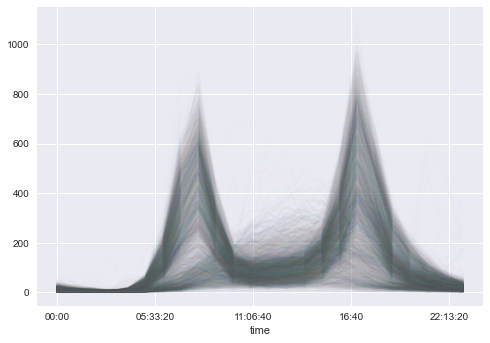

In [2]:
from data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table('Fremont Bridge Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [3]:
X =pivoted.fillna(0).T.values
X.shape

(3345, 24)

In [4]:
X2=PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(3345, 2)

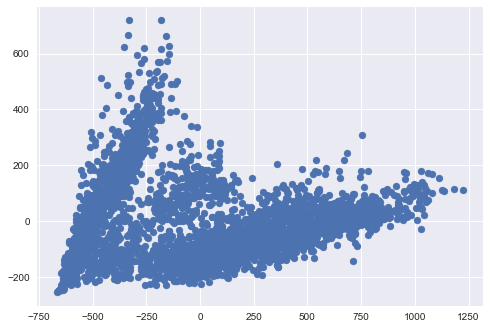

In [5]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clusering

In [6]:
gmm =GaussianMixture(2).fit(X)
labels = gmm.predict(X)

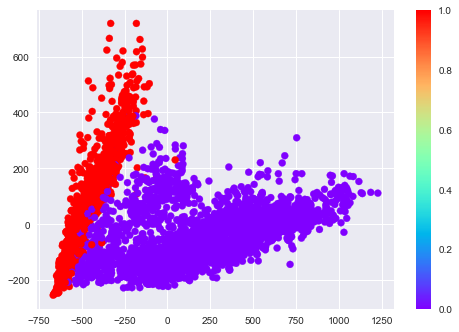

In [7]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Red Cluster')

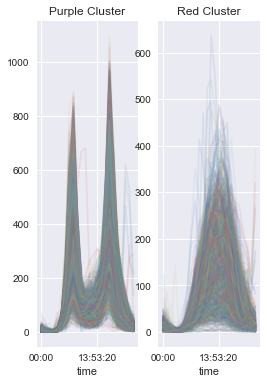

In [13]:
fig, ax=plt.subplots(1, 2, figsize=(4, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with Day of Week

In [9]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

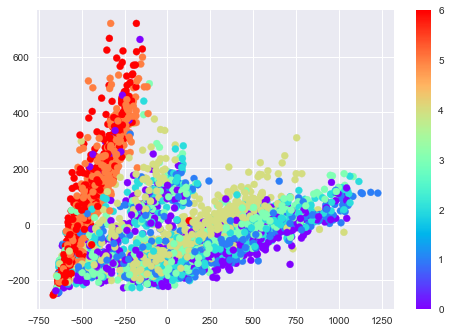

In [10]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers
with holiday-like pattern

In [14]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek <5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29', '2013-12-20', '2013-12-25',
               '2014-01-01', '2014-04-23', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-05-25', '2015-07-03', '2015-09-07', '2015-11-26',
               '2015-11-27', '2015-12-24', '2015-12-25', '2016-01-01',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-11-25', '2016-12-26', '2017-01-02', '2017-02-06',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-11-24', '2017-12-25', '2018-01-01', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-11-22', '2018-11-23',
               '2018-12-24', '2018-12-25', '2019-01-01', '2019-02-04',
               '2019-02-05', '2019-02-08', '2019-02-11', '2019-02-12',
      